In [194]:
# Data Cleaning and analysis packages
import pandas as pd
import numpy as np


# NLP packages
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
import gensim
from gensim import corpora, models
from textblob import TextBlob


# Sats and Modeling packages
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# Visualization packages
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.filterwarnings("ignore") 


pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 200)

In [195]:
clean_df = pd.read_csv("data/clean_df.csv", index_col = 0)

In [196]:
clean_df.head(10)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,['Texas winter ready!'],['I bought this last year and am going to buy ...,men's clothing,0,1
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,"['Wrangler is the best.', 'My Favorite Jeans',...","['I like wrangler, the pants is exactly for my...",men's clothing,1,1
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88.0,"['Jeans That Fit Just Right', 'Great jeans wou...","[""If you like Big Men's style wearing jeans th...",men's clothing,1,1
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91.0,"['Committed buyer', 'More Comfortable than Swe...",['My husband loves these jeans and goes throug...,men's clothing,1,1
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91.0,['Saved money and faster delivery that Amazon'...,['Fit well Great price same jeans I was buying...,men's clothing,1,2
5,Champion Men's Powerblend Fleece Pullover Hoodie,22.0,4.6,1247.0,95.0,"['Perfect!', 'Comfy Time', '2020 tie dye trend...",['They were exactly what I was searching for! ...,men's clothing,1,2
6,Fruit of the Loom Men's Core Waffle Thermal Top,5.0,3.3,9.0,100.0,"['Love them', 'Love them - definitely a classi...",['These are very cozy! Body pair for me and my...,men's clothing,1,0
7,Champion Men's Powerblend Graphic Crew,22.5,4.7,377.0,93.0,"['Great sweater and price!', 'A good purchase'...",['I bought 2 of these for $19 each were anothe...,men's clothing,1,2
8,Free Assembly Men's Two-Pocket Flannel Shirt,18.0,4.9,22.0,100.0,"['Washes well. Soft. Good value.', 'Super su...",['My husband also likes this shirt. I washed a...,men's clothing,1,2
9,Lee Men’s Big & Tall Regular Fit Jeans,24.9,4.4,913.0,88.0,"['Great jeans', 'From 501s to Lee Jeans. Best ...",['I have bought Lee jeans for several years. T...,men's clothing,1,1


In [197]:
clean_df.rev_title[4]

'[\'Saved money and faster delivery that Amazon\', \'Very comfortable jeans\', \'Great fit - not too baggy, not too skinny!\', \'Very durable\', \'Pockets are ripped on everyone about eight months\', "Wrangler men\'s relaxed fit jeans", \'Tight in thigh, lighter color in front not solid\', \'Ripped within the first week.\', \'Poor Quality\', \'Mis-manufactured on purpose...STUPID\', \'Bad quality control.\', \'Wrangler jeans. Still the best.\', \'Not What I Wanted\', \'NOT A FAN\', \'Solid. Replaced all my old jeans with these.\', \'These are ok\', \'Good fit\', \'Practical and comfortable at a great price.\', "Wrangler doesn\'t miss", \'How they fit\']'

In [198]:

x = '[\'Saved money and faster delivery that Amazon\', \'Very comfortable jeans\', \'Great fit - not too baggy, not too skinny!\', \'Very durable\', \'Pockets are ripped on everyone about eight months\', "Wrangler men\'s relaxed fit jeans", \'Tight in thigh, lighter color in front not solid\', \'Ripped within the first week.\', \'Poor Quality\', \'Mis-manufactured on purpose...STUPID\', \'Bad quality control.\', \'Wrangler jeans. Still the best.\', \'Not What I Wanted\', \'NOT A FAN\', \'Solid. Replaced all my old jeans with these.\', \'These are ok\', \'Good fit\', \'Practical and comfortable at a great price.\', "Wrangler doesn\'t miss", \'How they fit\']'
' '.join(re.sub("([^0-9A-Za-z])"," ",x).split())

'Saved money and faster delivery that Amazon Very comfortable jeans Great fit not too baggy not too skinny Very durable Pockets are ripped on everyone about eight months Wrangler men s relaxed fit jeans Tight in thigh lighter color in front not solid Ripped within the first week Poor Quality Mis manufactured on purpose STUPID Bad quality control Wrangler jeans Still the best Not What I Wanted NOT A FAN Solid Replaced all my old jeans with these These are ok Good fit Practical and comfortable at a great price Wrangler doesn t miss How they fit'

In [199]:
## all funcitons live in the scripts folder
def clean_text(text):
    text.replace("\\n"," ")
    text =  ' '.join(re.sub("([^A-Za-z])"," ",text).split())
    return text.lower()

In [200]:
clean_df["clean_rev_title"] = clean_df.rev_title.apply(clean_text)

### Now cleaning review_text column

In [201]:
clean_df["clean_review_text"] = clean_df["review_text"].apply(clean_text)

In [202]:
clean_df.review_text[8]

"['My husband also likes this shirt. I washed and put in dryer before wearing.  Came out almost free of wrinkles.  No shrinking that he noticed.  Nice soft plaid.  Need more colors.', 'The material is super soft and comfortable and the shirt has a good weight to it. If I compared it to paper, this is the card stock quality. :)', 'Got for my husband and he loves it and wears it all the time now. Great fit. Soft. Well-made. He loves the blue', 'These shirts are a very good quality.', 'Fits great. Happily surprised by the high quality of the fabric and make of this shirt.', 'Soft, perfect fit, and nice weight. Perfect for fall and winter!', 'Super comfy, high quality, looks great.  Will be ordering more of these shirts.', 'Great quality, fit and design', 'Nice quality, thick and warm!', 'What I thought was a light weight flannel shirt for Florida weather, I received a thick and heavy flannel jacket.  A better description is necessary.', 'Ordered a couple of Free Assembly flannels and am r

In [203]:
clean_df.head(6)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,clean_rev_title,clean_review_text
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,['Texas winter ready!'],['I bought this last year and am going to buy ...,men's clothing,0,1,texas winter ready,i bought this last year and am going to buy an...
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,"['Wrangler is the best.', 'My Favorite Jeans',...","['I like wrangler, the pants is exactly for my...",men's clothing,1,1,wrangler is the best my favorite jeans extreme...,i like wrangler the pants is exactly for my bo...
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88.0,"['Jeans That Fit Just Right', 'Great jeans wou...","[""If you like Big Men's style wearing jeans th...",men's clothing,1,1,jeans that fit just right great jeans would bu...,if you like big men s style wearing jeans thes...
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91.0,"['Committed buyer', 'More Comfortable than Swe...",['My husband loves these jeans and goes throug...,men's clothing,1,1,committed buyer more comfortable than sweatpan...,my husband loves these jeans and goes through ...
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91.0,['Saved money and faster delivery that Amazon'...,['Fit well Great price same jeans I was buying...,men's clothing,1,2,saved money and faster delivery that amazon ve...,fit well great price same jeans i was buying o...
5,Champion Men's Powerblend Fleece Pullover Hoodie,22.0,4.6,1247.0,95.0,"['Perfect!', 'Comfy Time', '2020 tie dye trend...",['They were exactly what I was searching for! ...,men's clothing,1,2,perfect comfy time tie dye trend online order ...,they were exactly what i was searching for nic...


# All text is now clean and ready to be used for feature engineering. 
Preprocessing steps:
- Tokenize and Lemmatize
- indentify stopwords
- Create a bag of words
- Textblob (subjectivity/polarity score)
- TfidfVectorizer # can be done right before train test split

In [204]:
lemmatizer = nltk.stem.WordNetLemmatizer()
stop_words=list(set(stopwords.words("english")))

In [205]:
# remove this line for final run! 
eda_stopwords = ["size", "color", "fit", "great", "pair", "right", "x", "xl" ]

stop_words=list(set(stopwords.words("english")))

stop_words.extend(eda_stopwords)

In [206]:
def tokenize(text):
    return nltk.word_tokenize(text)

In [207]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

In [208]:
def lemmatize_text(text):
     return [lemmatizer.lemmatize(word) for word in text]

In [209]:
def fdist(df, column):
    corpus = " ".join([" ".join(text) for text in df[column].to_list()])
    corpus = tokenize(corpus)
    fdist=FreqDist(corpus)
    print(f"Number of words in corpus: {len(fdist)}")
    fdist.plot(20);

In [210]:
clean_df["tokenized"] = clean_df.clean_review_text.apply(tokenize)

Number of words in corpus: 10290


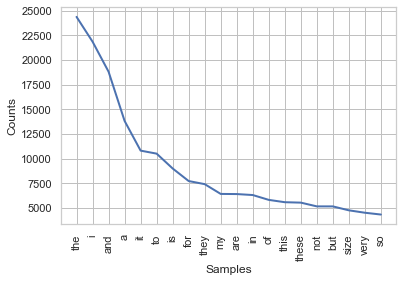

In [211]:
fdist(clean_df, "tokenized")

In [212]:
clean_df["rem_stop"] = clean_df.tokenized.apply(remove_stopwords)

Number of words in corpus: 10135


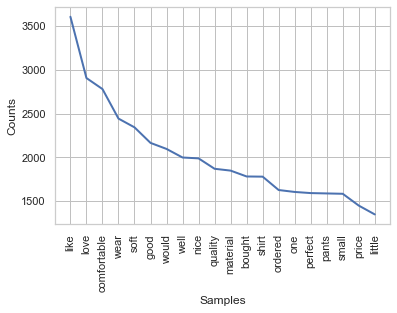

In [213]:
fdist(clean_df, "rem_stop")

In [214]:
clean_df["lemma_words"] = clean_df.rem_stop.apply(lemmatize_text)

Number of words in corpus: 9082


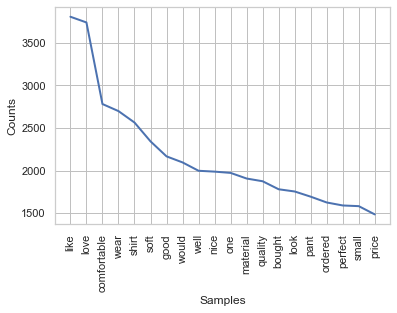

In [215]:
fdist(clean_df, "lemma_words")

In [216]:
clean_df.head()

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,clean_rev_title,clean_review_text,tokenized,rem_stop,lemma_words
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,['Texas winter ready!'],['I bought this last year and am going to buy ...,men's clothing,0,1,texas winter ready,i bought this last year and am going to buy an...,"[i, bought, this, last, year, and, am, going, ...","[bought, last, year, going, buy, another, frid...","[bought, last, year, going, buy, another, frid..."
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,"['Wrangler is the best.', 'My Favorite Jeans',...","['I like wrangler, the pants is exactly for my...",men's clothing,1,1,wrangler is the best my favorite jeans extreme...,i like wrangler the pants is exactly for my bo...,"[i, like, wrangler, the, pants, is, exactly, f...","[like, wrangler, pants, exactly, body, also, g...","[like, wrangler, pant, exactly, body, also, go..."
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88.0,"['Jeans That Fit Just Right', 'Great jeans wou...","[""If you like Big Men's style wearing jeans th...",men's clothing,1,1,jeans that fit just right great jeans would bu...,if you like big men s style wearing jeans thes...,"[if, you, like, big, men, s, style, wearing, j...","[like, big, men, style, wearing, jeans, would,...","[like, big, men, style, wearing, jean, would, ..."
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91.0,"['Committed buyer', 'More Comfortable than Swe...",['My husband loves these jeans and goes throug...,men's clothing,1,1,committed buyer more comfortable than sweatpan...,my husband loves these jeans and goes through ...,"[my, husband, loves, these, jeans, and, goes, ...","[husband, loves, jeans, goes, quite, lot, thro...","[husband, love, jean, go, quite, lot, througho..."
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91.0,['Saved money and faster delivery that Amazon'...,['Fit well Great price same jeans I was buying...,men's clothing,1,2,saved money and faster delivery that amazon ve...,fit well great price same jeans i was buying o...,"[fit, well, great, price, same, jeans, i, was,...","[well, price, jeans, buying, amazon, lot, less...","[well, price, jean, buying, amazon, lot, le, m..."


In [217]:
no_rec = clean_df[clean_df.target == 0]
yes_rec = clean_df[clean_df.target == 1]

In [218]:
no_rec.head(2)

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,clean_rev_title,clean_review_text,tokenized,rem_stop,lemma_words
0,Wrangler Men's Unlined Shirt Jacket,12.00,4.0,7.0,80.0,['Texas winter ready!'],['I bought this last year and am going to buy ...,men's clothing,0,1,texas winter ready,i bought this last year and am going to buy an...,"[i, bought, this, last, year, and, am, going, ...","[bought, last, year, going, buy, another, frid...","[bought, last, year, going, buy, another, frid..."
10,Eddie Bauer Men's CirrusLite Down Jacket,49.98,4.4,16.0,44.0,"[""Don't Be Fooled By The Low Price"", 'Great li...","[""This jacket has REALLY impressed me. It's S...",men's clothing,0,1,don t be fooled by the low price great lightwe...,this jacket has really impressed me it s so li...,"[this, jacket, has, really, impressed, me, it,...","[jacket, really, impressed, light, like, plast...","[jacket, really, impressed, light, like, plast..."


In [219]:
text = no_rec["lemma_words"].values
text = " ".join(" ".join(word) for word in text)

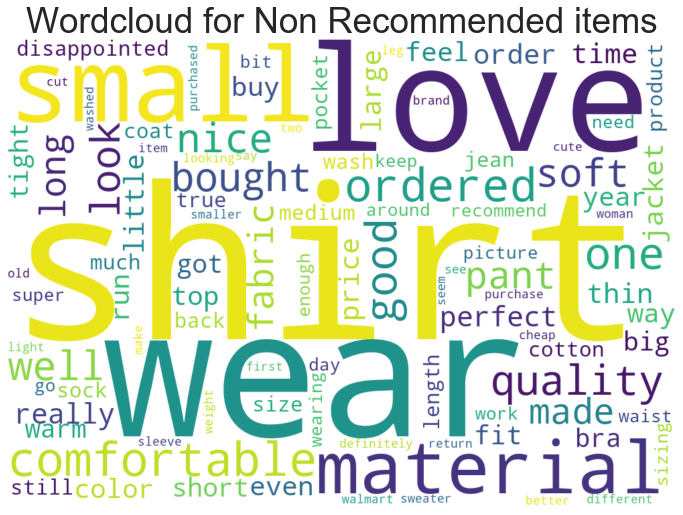

In [220]:
fig, ax = plt.subplots(figsize=(12,17))

wordcloud = WordCloud(max_words=100,collocations=False, width=1000, height=700, background_color="white", random_state=0).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for Non Recommended items", fontsize = 35)
plt.show()

In [221]:
text =yes_rec["lemma_words"].values
text = " ".join(" ".join(word) for word in text)

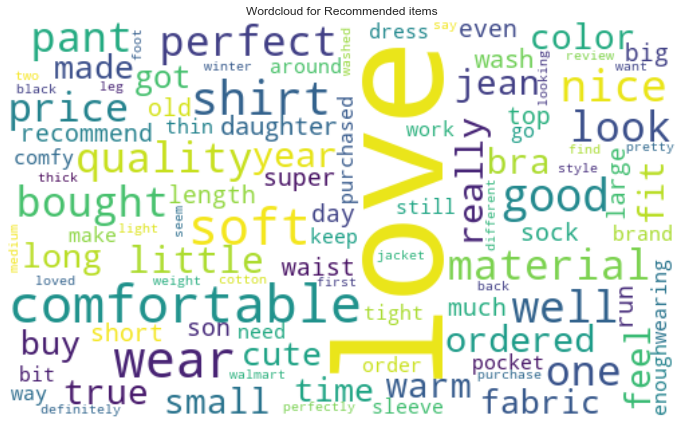

In [222]:
fig, ax = plt.subplots(figsize=(12,17))

wordcloud = WordCloud(max_words=100,collocations=False, width=500, height=300, background_color="white", random_state =0).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for Recommended items")
plt.show()

In [223]:
clean_df.to_csv("data/sectioning_df.csv")

In [224]:
under_60 = clean_df[clean_df.recommend <=60]
over_60 = clean_df[clean_df.recommend > 60]

In [225]:
u60_text = under_60.lemma_words.values
u60_text = " ".join(" ".join(word) for word in u60_text)

o60_text = over_60.lemma_words.values
o60_text = " ".join(" ".join(word) for word in o60_text)


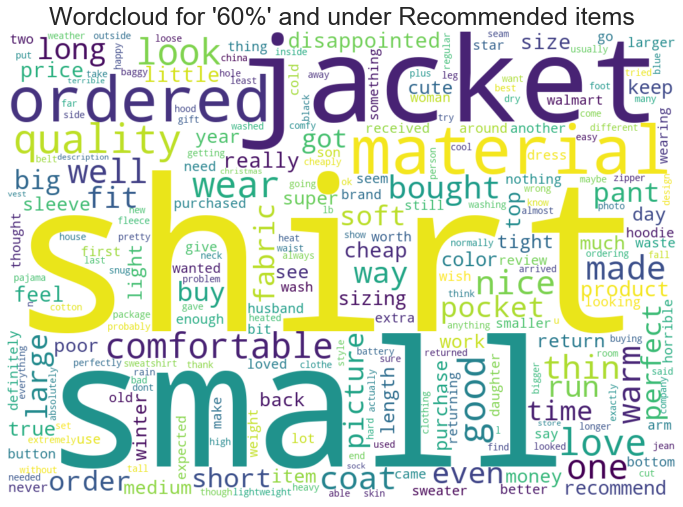

In [226]:
fig, ax = plt.subplots(figsize=(12,17))

wordcloud = WordCloud(max_words=250,collocations=False, width=1000, height=700, background_color="white", random_state=0).generate(u60_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for '60%' and under Recommended items", fontsize = 25)
plt.show()

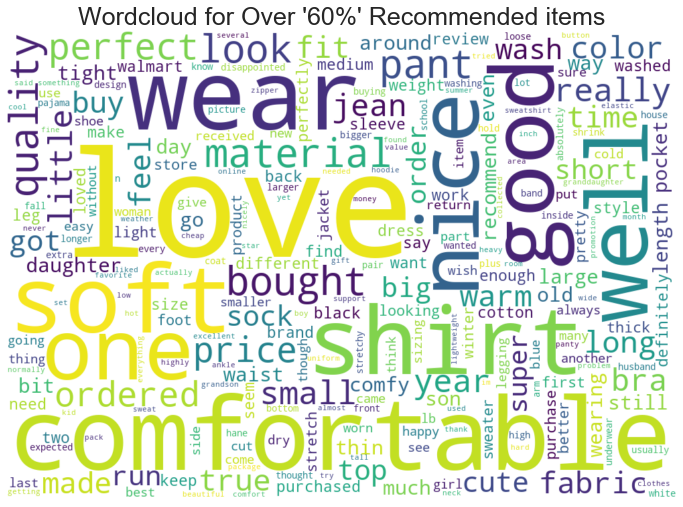

In [227]:
fig, ax = plt.subplots(figsize=(12,17))

wordcloud = WordCloud(max_words=250,collocations=False, width=1000, height=700, background_color="white", random_state=0).generate(o60_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud for Over '60%' Recommended items", fontsize = 25)
plt.show()

Adding new stopwords found from the word cloud

In [228]:
eda_stopwords = ["nd", "de", "c", "great", "wow", "must", "six", "goat", "thou", "un", "lb", "pair", "right", "x", "xl", "one", "way", "definitely", "shirt", "jacket", "daughter", "son" ]

stop_words=list(set(stopwords.words("english")))

stop_words.extend(eda_stopwords)

In [229]:
clean_df["lemma_words"]

0       [bought, last, year, going, buy, another, frid...
1       [like, wrangler, pant, exactly, body, also, go...
2       [like, big, men, style, wearing, jean, would, ...
3       [husband, love, jean, go, quite, lot, througho...
4       [well, price, jean, buying, amazon, lot, le, m...
                              ...                        
1144    [small, way, little, average, year, old, cute,...
1145    [make, sure, go, shirt, run, small, pant, fine...
1146    [cutest, outfit, top, little, thicker, tshirt,...
1147    [nice, plush, jacket, young, girl, nice, weigh...
1148    [cute, tye, dye, awesome, sizing, little, big,...
Name: lemma_words, Length: 1149, dtype: object

In [230]:
def list_to_str(text):
    return ", ".join(text)

clean_df["delisted"] = clean_df["lemma_words"].apply(list_to_str)

### need to move below train test split. 

In [231]:
encoder = OneHotEncoder(handle_unknown="error", drop="first" )
coded_cat=pd.DataFrame(encoder.fit_transform(clean_df[["section"]]).toarray())


In [232]:
coded_cat.rename(columns={0:"girls'", 1:"men's", 2:"women's"},inplace=True)

In [233]:
frames = [clean_df, coded_cat]

In [234]:
df = pd.concat(frames, axis=1)

In [235]:
df.shape

(1149, 19)

In [236]:
interest = ["price", "overall_rating", "recommend", "rating_bin", "target"]

In [237]:
corr = df[interest].corr()

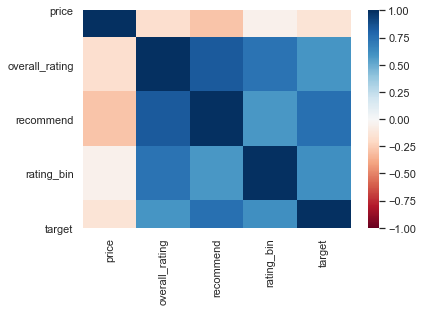

In [238]:
sns.heatmap(corr, cmap = "RdBu", vmin = -1, vmax= 1)

In [239]:
clean_df["lemma_words"] = clean_df["lemma_words"].apply(remove_stopwords)

# LDA (Topic) Model

In [240]:
import gensim

In [241]:
dataset = [d.split() for d in clean_df.delisted]
vocab = gensim.corpora.Dictionary(dataset)


In [242]:
dictionary = gensim.corpora.Dictionary(clean_df["lemma_words"])
dictionary.filter_extremes(no_above=0.5)

In [243]:
sparce_matrix = [dictionary.doc2bow(doc) for doc in clean_df["lemma_words"]]

In [244]:
tfidf = models.TfidfModel(sparce_matrix)
corpus_tfidf = tfidf[sparce_matrix]

In [245]:
%%time
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf,  num_topics=10, id2word=vocab, passes=100, workers=8, random_state=0)

CPU times: user 2min 39s, sys: 4.69 s, total: 2min 44s
Wall time: 2min 55s


In [246]:
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} \n\Word: {}\n'.format(idx, topic))

Topic: 0 
\Word: 0.001*"aspect," + 0.000*"hard," + 0.000*"hair," + 0.000*"figure," + 0.000*"body," + 0.000*"pellet," + 0.000*"blown," + 0.000*"heated," + 0.000*"jusy," + 0.000*"making,"

Topic: 1 
\Word: 0.002*"nbought," + 0.000*"trim," + 0.000*"excess," + 0.000*"bleach," + 0.000*"usually," + 0.000*"ready," + 0.000*"road," + 0.000*"travel," + 0.000*"nthey," + 0.000*"nnice,"

Topic: 2 
\Word: 0.003*"male," + 0.003*"cargo," + 0.002*"trim," + 0.002*"trick," + 0.002*"weirdly," + 0.001*"usual," + 0.001*"communication," + 0.001*"n," + 0.001*"nquality," + 0.001*"marketplace,"

Topic: 3 
\Word: 0.005*"motorcycle," + 0.004*"actual," + 0.004*"grew," + 0.004*"window," + 0.004*"sort," + 0.003*"polyester," + 0.003*"product," + 0.003*"massive," + 0.003*"nnice," + 0.003*"price,"

Topic: 4 
\Word: 0.000*"dc," + 0.000*"stained," + 0.000*"aspect," + 0.000*"eventually," + 0.000*"bc," + 0.000*"treating," + 0.000*"trim," + 0.000*"trick," + 0.000*"sorely," + 0.000*"weirdly,"

Topic: 5 
\Word: 0.002*"stained

In [247]:
corpus_transformed = lda_model_tfidf[sparce_matrix]

In [248]:
%%time
# convert to dataframe
topics = [dict(x) for x in corpus_transformed]

# convert list of lda topic weights to dataframe
lda_tfidf_df = pd.DataFrame(topics)
# rename columns
lda_tfidf_df.rename(columns={i: f'topic{i}' for i in range(10)}, inplace=True)

lda_tfidf_df.fillna(0, inplace=True)

CPU times: user 185 ms, sys: 6.6 ms, total: 191 ms
Wall time: 193 ms


In [249]:
lda_tfidf_df

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,0.011114,0.011114,0.011114,0.899972,0.011114,0.011114,0.011114,0.011114,0.011114,0.011114
1,0.000000,0.000000,0.000000,0.998059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.997692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.996102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.997304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1144,0.012501,0.012501,0.012501,0.887487,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501
1145,0.000000,0.000000,0.000000,0.954993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1146,0.000000,0.000000,0.000000,0.981628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1147,0.000000,0.000000,0.000000,0.989652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [250]:
frames = [df, lda_tfidf_df]
df = pd.concat(frames, axis=1)

In [251]:
df.shape

(1149, 29)

In [252]:
df.iloc[:,19:29]

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,0.011114,0.011114,0.011114,0.899972,0.011114,0.011114,0.011114,0.011114,0.011114,0.011114
1,0.000000,0.000000,0.000000,0.998059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.997692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.996102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.997304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1144,0.012501,0.012501,0.012501,0.887487,0.012501,0.012501,0.012501,0.012501,0.012501,0.012501
1145,0.000000,0.000000,0.000000,0.954993,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1146,0.000000,0.000000,0.000000,0.981628,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1147,0.000000,0.000000,0.000000,0.989652,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [193]:
df.head()

,item_name,price,overall_rating,num_rating,recommend,rev_title,review_text,section,target,rating_bin,clean_rev_title,clean_review_text,tokenized,rem_stop,lemma_words,delisted,girls',men's,women's,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,max_topic,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
0,Wrangler Men's Unlined Shirt Jacket,12.0,4.0,7.0,80.0,['Texas winter ready!'],['I bought this last year and am going to buy ...,men's clothing,0,1,texas winter ready,i bought this last year and am going to buy an...,"[i, bought, this, last, year, and, am, going, ...","[bought, last, year, going, buy, another, frid...","[bought, last, year, going, buy, another, frid...","bought, last, year, going, buy, another, frida...",0.0,1.0,0.0,0.011114,0.011114,0.011114,0.899972,0.011114,0.011114,0.011114,0.011114,0.011114,0.011114,topic3,0.011114,0.011114,0.011114,0.899972,0.011114,0.011114,0.011114,0.011114,0.011114,0.011114,0.011114,0.011114,0.011114,0.899972,0.011114,0.011114,0.011114,0.011114,0.011114,0.011114
1,Wrangler Men's Relaxed Fit Jeans,12.0,4.5,5840.0,90.0,"['Wrangler is the best.', 'My Favorite Jeans',...","['I like wrangler, the pants is exactly for my...",men's clothing,1,1,wrangler is the best my favorite jeans extreme...,i like wrangler the pants is exactly for my bo...,"[i, like, wrangler, the, pants, is, exactly, f...","[like, wrangler, pants, exactly, body, also, g...","[like, wrangler, pant, exactly, body, also, go...","like, wrangler, pant, exactly, body, also, goo...",0.0,1.0,0.0,0.000000,0.000000,0.000000,0.998059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,topic3,0.000000,0.000000,0.000000,0.998059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.998059,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Wrangler Big Men's Relaxed Fit Jean,15.0,4.3,3257.0,88.0,"['Jeans That Fit Just Right', 'Great jeans wou...","[""If you like Big Men's style wearing jeans th...",men's clothing,1,1,jeans that fit just right great jeans would bu...,if you like big men s style wearing jeans thes...,"[if, you, like, big, men, s, style, wearing, j...","[like, big, men, style, wearing, jeans, would,...","[like, big, men, style, wearing, jean, would, ...","like, big, men, style, wearing, jean, would, r...",0.0,1.0,0.0,0.000000,0.000000,0.000000,0.997692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,topic3,0.000000,0.000000,0.000000,0.997692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.997692,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Wrangler Men's 5 Star Regular Fit Jean with Flex,12.0,4.5,259.0,91.0,"['Committed buyer', 'More Comfortable than Swe...",['My husband loves these jeans and goes throug...,men's clothing,1,1,committed buyer more comfortable than sweatpan...,my husband loves these jeans and goes through ...,"[my, husband, loves, these, jeans, and, goes, ...","[husband, loves, jeans, goes, quite, lot, thro...","[husband, love, jean, go, quite, lot, througho...","husband, love, jean, go, quite, lot, throughou...",0.0,1.0,0.0,0.000000,0.000000,0.000000,0.996102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,topic3,0.000000,0.000000,0.000000,0.996102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.996102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Wrangler Men's and Big Men's 5 Star Relaxed Fi...,15.0,4.6,1490.0,91.0,['Saved money and faster delivery that Amazon'...,['Fit well Great price same jeans I was buying...,men's clothing,1,2,saved money and faster delivery that amazon ve...,fit well great price same jeans i was buying o...,"[fit, well, great, price, same, jeans, i, was,...","[well, price, jeans, buying, amazon, lot, less...","[well, price, jean, buying, amazon, lot, le, m...","well, price, jean, buying, amazon, lot, le, mo...",0.0,1.0,0.0,0.000000,0.0

In [254]:
import pickle

In [257]:
filename = "modeling_df"
outfile = open(filename, "wb")

In [258]:
pickle.dump(df,outfile)
outfile.close

<function BufferedWriter.close>

# Train Test Split

In [141]:
drop_features = ["item_name", "overall_rating", "rating_bin", "recommend", "rev_title", "clean_rev_title", 
                 "clean_review_text", "review_text", "section", "tokenized", "rem_stop", "lemma_words", 
                 "target", 'max_topic']#, "topic0", "topic1", "topic2", "topic3", "topic4", "topic5", "topic6", "topic7", "topic8", "topic9"]

In [142]:
X = df.drop(columns = drop_features)
y = df["target"].values

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [144]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(919, 16) (919,) (230, 16) (230,)


In [145]:
X_train.tail()

,price,num_rating,delisted,girls',men's,women's,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9
1033,15.88,10.0,"wonder, nation, girl, long, sleeve, cozy, swin...",1.0,0.0,0.0,0.0,0.0,0.0,0.986952,0.0,0.0,0.0,0.0,0.0,0.0
763,17.94,10.0,"second, year, purchasing, pant, son, walmart, ...",0.0,0.0,0.0,0.0,0.0,0.0,0.983633,0.0,0.0,0.0,0.0,0.0,0.0
835,13.94,160.0,"got, grandson, gon, na, look, feel, comfortabl...",0.0,0.0,0.0,0.0,0.0,0.0,0.996524,0.0,0.0,0.0,0.0,0.0,0.0
559,15.99,7.0,"ordered, child, bottom, small, even, pull, top...",0.0,0.0,1.0,0.0,0.0,0.0,0.981996,0.0,0.0,0.0,0.0,0.0,0.0
684,16.00,114.0,"incredibly, comfortable, stylish, sweatpants, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.996136,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
X_train.isnull().sum()

price         0
num_rating    0
delisted      0
girls'        0
men's         0
women's       0
topic0        0
topic1        0
topic2        0
topic3        0
topic4        0
topic5        0
topic6        0
topic7        0
topic8        0
topic9        0
dtype: int64

In [147]:
#X_train.reset_index(drop=True)

In [148]:
tfidfconverter = TfidfVectorizer(stop_words = stop_words, ngram_range = (1,2), max_features=2000, use_idf=True)  


train_vec = tfidfconverter.fit_transform(X_train.delisted.values).toarray()
test_vec = tfidfconverter.fit_transform(X_test.delisted.values).toarray()



tfidf_train = pd.DataFrame(train_vec, columns = tfidfconverter.get_feature_names())
tfidf_test = pd.DataFrame(test_vec, columns = tfidfconverter.get_feature_names())

In [149]:
tfidf_train.head()

,able,able wear,absolutely,absolutely adorable,absolutely love,absolutely loved,acceptable,accessory,according,accurate,across,active,activity,actual,actually,add,added,addition,adjust,adjustable,adjustable waist,adorable,adult,advertised,affordable,age,ago,air,air dry,allow,almost,almost like,alone,along,already,also,also comfortable,also like,also love,also ordered,also run,also soft,although,always,always worn,amazing,american,amount,amount stretch,ankle,annoying,another,another brand,another different,anymore,anyone,anything,anything like,anyway,anywhere,apart,appear,appearance,appears,appreciate,appropriate,aqua,area,arm,armhole,armpit,around,around ankle,around house,arrive,arrived,arrived quickly,ask,athletic,athletic workout,attractive,available,average,avia,away,awesome,awful,awkward,baby,back,back pocket,back school,bad,bag,baggy,ball,band,bar,barely,bargain,based,baselayer,baselayer cool,basic,basically,batch,bathrobe,battery,bc,beat,beat price,beautiful,beautiful dress,beautifully,become,bed,behind,believe,belly,belt,bend,bending,best,best fitting,best thing,better,better expected,beware,beyond,bib,big,big deal,big enough,big wear,bigger,biggest,bikini,bill,birthday,bit,bit big,bit snug,bit tight,black,black white,blend,blouse,blue,body,body type,...,washed well,washed yet,washer,washing,washing machine,waste,waste money,watch,water,water resistant,wear,wear also,wear anything,wear around,wear bra,wear day,wear dress,wear large,wear love,wear medium,wear ordered,wear pant,wear school,wear shoe,wear skirt,wear time,wear wear,wear well,wear work,wear would,wearable,wearing,wearing bra,weather,website,week,weekend,weigh,weight,weight fabric,weird,well,well comfortable,well constructed,well done,well good,well like,well look,well love,well made,well nice,well perfect,well true,well worth,went,went back,wet,whatever,white,whole,wide,wider,width,wife,win,wind,winter,winter coat,winter month,wire,wish,wish came,wish color,wish could,wish would,within,without,woman,wonder,wonder long,wonder nation,wonderful,wonderfully,wont,word,wore,work,work well,worked,working,workout,workout running,world,worn,worried,worst,worth,worth money,worth price,would,would big,would buy,would even,would get,would go,would like,would look,would love,would make,would never,would nice,would order,would probably,would purchase,would recommend,would say,would suggest,would wear,wrangler,wrangler jean,wrap,wrap around,wrap dress,wrinkle,wrinkled,wrist,write,writing,wrong,wrote,xa,xxl,yard,yeah,year,year ago,year always,year love,year old,yellow,yes,yesterday,yet,yo,younger,yr,yr old,zero,zip,zipper
0,0.0,0.0,0.0,0.0,0.0,0.0,0.157579,0.0,0.0,0.0,0.0,0.090226,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.062289,0.144165,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.09364,0.0,0.0,0.0,0.0,0.000000,0.071991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.155640,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.

In [150]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

In [151]:
X_train.shape, X_test.shape

((919, 16), (230, 16))

In [152]:
frame1 = [X_train, tfidf_train]
frame2 = [X_test, tfidf_test]

In [153]:
X_train = pd.concat(frame1, axis=1)
X_test = pd.concat(frame2, axis=1)

In [154]:
X_train.head()

,price,num_rating,delisted,girls',men's,women's,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,able,able wear,absolutely,absolutely adorable,absolutely love,absolutely loved,acceptable,accessory,according,accurate,across,active,activity,actual,actually,add,added,addition,adjust,adjustable,adjustable waist,adorable,adult,advertised,affordable,age,ago,air,air dry,allow,almost,almost like,alone,along,already,also,also comfortable,also like,also love,also ordered,also run,also soft,although,always,always worn,amazing,american,amount,amount stretch,ankle,annoying,another,another brand,another different,anymore,anyone,anything,anything like,anyway,anywhere,apart,appear,appearance,appears,appreciate,appropriate,aqua,area,arm,armhole,armpit,around,around ankle,around house,arrive,arrived,arrived quickly,ask,athletic,athletic workout,attractive,available,average,avia,away,awesome,awful,awkward,baby,back,back pocket,back school,bad,bag,baggy,ball,band,bar,barely,bargain,based,baselayer,baselayer cool,basic,basically,batch,bathrobe,battery,bc,beat,beat price,beautiful,beautiful dress,beautifully,become,bed,behind,believe,belly,belt,bend,bending,best,best fitting,best thing,better,better expected,beware,beyond,bib,big,big deal,big enough,big wear,...,washed well,washed yet,washer,washing,washing machine,waste,waste money,watch,water,water resistant,wear,wear also,wear anything,wear around,wear bra,wear day,wear dress,wear large,wear love,wear medium,wear ordered,wear pant,wear school,wear shoe,wear skirt,wear time,wear wear,wear well,wear work,wear would,wearable,wearing,wearing bra,weather,website,week,weekend,weigh,weight,weight fabric,weird,well,well comfortable,well constructed,well done,well good,well like,well look,well love,well made,well nice,well perfect,well true,well worth,went,went back,wet,whatever,white,whole,wide,wider,width,wife,win,wind,winter,winter coat,winter month,wire,wish,wish came,wish color,wish could,wish would,within,without,woman,wonder,wonder long,wonder nation,wonderful,wonderfully,wont,word,wore,work,work well,worked,working,workout,workout running,world,worn,worried,worst,worth,worth money,worth price,would,would big,would buy,would even,would get,would go,would like,would look,would love,would make,would never,would nice,would order,would probably,would purchase,would recommend,would say,would suggest,would wear,wrangler,wrangler jean,wrap,wrap around,wrap dress,wrinkle,wrinkled,wrist,write,writing,wrong,wrote,xa,xxl,yard,yeah,year,year ago,year always,year love,year old,yellow,yes,yesterday,yet,yo,younger,yr,yr old,zero,zip,zipper
0,11.94,13.0,"thick, material, quality, product, price, good...",1.0,0.0,0.0,0.0,0.0,0.0,0.977495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.157579,0.0,0.0,0.0,0.0,0.090226,0.000000,0.0,0.0000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.062289,0.144165,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.09364,0.0,0.0,0.0,0.0,0.000000,0.071991,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [155]:
X_train.isnull().sum()

price         0
num_rating    0
delisted      0
girls'        0
men's         0
             ..
yr            0
yr old        0
zero          0
zip           0
zipper        0
Length: 2016, dtype: int64

In [156]:
X_train.drop(columns = ["delisted"], inplace = True)
X_test.drop(columns = "delisted", inplace=True)

In [157]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(919, 2015) (919,) (230, 2015) (230,)


# Logistic Regression

In [158]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg_clf = LogisticRegression(penalty = "l2", random_state = 0,n_jobs=-1)
logreg_clf.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=0)

In [159]:
y_pred_lr = logreg_clf.predict(X_test)
print("F1 score is:", metrics.f1_score(y_test, y_pred_lr))
print("-"*60)                         
print(classification_report(y_test, y_pred_lr))

F1 score is: 0.8235294117647058
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.15      0.23        67
           1       0.73      0.94      0.82       163

    accuracy                           0.71       230
   macro avg       0.63      0.55      0.53       230
weighted avg       0.67      0.71      0.65       230



In [81]:
print(logreg.coef_, logreg.intercept_)

[[-2.55652334e-02 -1.13937588e-04 -9.78507683e-01 ... -2.25938705e-01
   8.86523487e-02  3.00885493e-01]] [1.34493332]


In [82]:
logreg.coef_[0]

array([-2.55652334e-02, -1.13937588e-04, -9.78507683e-01, ...,
       -2.25938705e-01,  8.86523487e-02,  3.00885493e-01])

In [83]:
def get_coef_name(fit_model, df):
    temp = (list(zip(fit_model.coef_[0], df.columns)))
    return sorted(temp,key = lambda x: x[0], reverse=True)

In [84]:
log_reg_coef=pd.DataFrame(get_coef_name(logreg, X_train), columns = ["coefficient", "feature"])

In [169]:
log_reg_coef[1090:1100]

,coefficient,feature
1090,0.002642,would buy
1091,0.002620,woman
1092,0.002544,topic6
1093,0.002472,bit snug
1094,0.002381,advertised
1095,0.001644,bigger
1096,0.001623,picture look
1097,0.001533,underneath
1098,0.001446,weekend
1099,0.001314,choice


In [166]:
2015/2

1007.5

In [85]:
imp_coef = pd.concat([log_reg_coef.head(),log_reg_coef.tail()])

<BarContainer object of 10 artists>

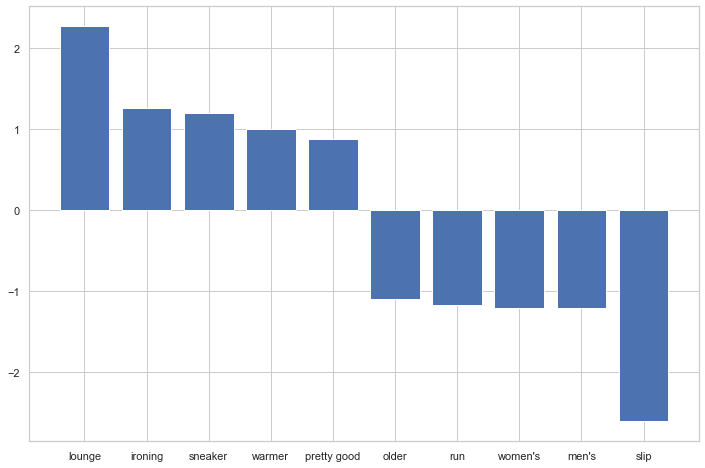

In [86]:
fig, ax = plt.subplots(figsize = (12,8))
plt.bar(x = imp_coef.feature, height =imp_coef.coefficient)
plt.title("Logistic Regression ")

# Bernoulli Naive Bayes

In [87]:
B_nb = BernoulliNB(alpha=0.1)
B_nb.fit(X_train, y_train)

BernoulliNB(alpha=0.1)

In [88]:
y_pred_Bnb = B_nb.predict(X_test)
BNB_cm = confusion_matrix(y_test, y_pred_Bnb)
print("F1 score is:", metrics.f1_score(y_test, y_pred_Bnb))
print("-"*60)                         
print(classification_report(y_test, y_pred_Bnb))

F1 score is: 0.8202247191011235
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.30      0.38        67
           1       0.76      0.90      0.82       163

    accuracy                           0.72       230
   macro avg       0.65      0.60      0.60       230
weighted avg       0.69      0.72      0.69       230



# Random Forest Classifier

In [89]:
rfc_classifier = RandomForestClassifier(n_estimators = 300, criterion = "entropy", random_state = 0, class_weight = "balanced")

In [90]:
rfc_classifier.fit(X_train, y_train)
y_pred_RF = rfc_classifier.predict(X_test)
print("F1 score is:", metrics.f1_score(y_test, y_pred_RF))
print("-"*100)                         
print(classification_report(y_test, y_pred_RF))
print("-"*100)
RFC_cm = confusion_matrix(y_test, y_pred_RF)
print(RFC_cm)

F1 score is: 0.8191489361702127
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.47      0.12      0.19        67
           1       0.72      0.94      0.82       163

    accuracy                           0.70       230
   macro avg       0.60      0.53      0.50       230
weighted avg       0.65      0.70      0.64       230

----------------------------------------------------------------------------------------------------
[[  8  59]
 [  9 154]]


In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
rfc = RandomForestClassifier(n_estimators = 300, criterion = "entropy",
                             random_state = 0, verbose=1, n_jobs=-1, class_weight="balanced")

In [93]:
param_dict={'min_samples_leaf':range(1,10,1), 'max_depth': range(1,10,1), "max_leaf_nodes":range(9,15,1)}

In [94]:
grid_tree = GridSearchCV(rfc, param_dict, cv=5, scoring="f1", verbose=2, n_jobs=-1)


grid_tree.fit(X_train, y_train)
#rfc.fit(X_train_tfidf, y_train_tfidf)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   29.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  9.6min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.4s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              criterion='entropy',
                                              n_estimators=300, n_jobs=-1,
                                              random_state=0, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'max_leaf_nodes': range(9, 15),
                         'min_samples_leaf': range(1, 10)},
             scoring='f1', verbose=2)

In [95]:
grid_tree_pred = grid_tree.predict(X_test)
print("F1 score is:", metrics.f1_score(y_test, grid_tree_pred))
print("-"*60)                         
print(classification_report(y_test, grid_tree_pred))
print("-"*100)
Grid_cm = confusion_matrix(y_test, grid_tree_pred)
print(Grid_cm)

F1 score is: 0.8103448275862069
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.34      0.41        67
           1       0.76      0.87      0.81       163

    accuracy                           0.71       230
   macro avg       0.64      0.60      0.61       230
weighted avg       0.69      0.71      0.69       230

----------------------------------------------------------------------------------------------------
[[ 23  44]
 [ 22 141]]


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


In [96]:
print(grid_tree.best_params_)
print("-"*100)
print(grid_tree.best_estimator_)
print("-"*100)
print(grid_tree.best_estimator_.feature_importances_)

{'max_depth': 6, 'max_leaf_nodes': 9, 'min_samples_leaf': 3}
----------------------------------------------------------------------------------------------------
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_leaf_nodes=9, min_samples_leaf=3,
                       n_estimators=300, n_jobs=-1, random_state=0, verbose=1)
----------------------------------------------------------------------------------------------------
[0.00542704 0.00223277 0.00064149 ... 0.00129879 0.         0.        ]


In [161]:
logreg = LogisticRegression(random_state = 0, n_jobs=-1, verbose=2)
log_dict = {'tol': [8,9,10,11,12], 'C': [1,5], 'penalty': ["l1", "l2"]}

In [162]:
grid_log = GridSearchCV(logreg, log_dict, cv=5, scoring="f1", verbose=2, n_jobs=-1)


grid_log.fit(X_train, y_train)
#rfc.fit(X_train_tfidf, y_train_tfidf)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.5s finished


GridSearchCV(cv=5,
             estimator=LogisticRegression(n_jobs=-1, random_state=0, verbose=2),
             n_jobs=-1,
             param_grid={'C': [1, 5], 'penalty': ['l1', 'l2'],
                         'tol': [8, 9, 10, 11, 12]},
             scoring='f1', verbose=2)

In [163]:
grid_log_pred = grid_log.predict(X_test)
print("F1 score is:", metrics.f1_score(y_test, grid_log_pred))
print("-"*60)                         
print(classification_report(y_test, grid_log_pred))
print("-"*100)
Grid_cm = confusion_matrix(y_test, grid_log_pred)
print(Grid_cm)

F1 score is: 0.8235294117647058
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.53      0.15      0.23        67
           1       0.73      0.94      0.82       163

    accuracy                           0.71       230
   macro avg       0.63      0.55      0.53       230
weighted avg       0.67      0.71      0.65       230

----------------------------------------------------------------------------------------------------
[[ 10  57]
 [  9 154]]


In [164]:
print(grid_log.best_params_)
print("-"*100)
print(grid_log.best_estimator_)
print("-"*100)

{'C': 1, 'penalty': 'l2', 'tol': 8}
----------------------------------------------------------------------------------------------------
LogisticRegression(C=1, n_jobs=-1, random_state=0, tol=8, verbose=2)
----------------------------------------------------------------------------------------------------


In [ ]:
def stacked_classifier(list_of_models,
                       X_test,
                       y_test,
                       model_input_shape=None, 
                       model_weights=None,
                       threshold=0.5,
                       soft_voting=True):
    """
    given a list of classifiers, returns a hard or soft voting array of predictions
    """
    # instantiate a prediction matrix
    m = len(X_test) # matrix rows
    n = len(list_of_models) # matrix columns
    prediction_matrix = np.ones((m,n))
    # update predictions matrix
    for i in range(0,n):
        print(f"Generating predictions for model {i+1}")
        model = list_of_models[i]
        p = model.predict(X_test)
        prediction_matrix[:,i] *= p.ravel()
        print(f"Finished prediction on model {i+1}")
    # Adjust the weights of each prediction
    if model_weights:
        print("Adjusting weights of the classifier's predictins", end="/n/n")
        for i, weight in enumerate(model_weights):
            prediction_matrix[:,i] *= model_weights[weight]
    if not soft_voting:
        print("Returning hard voting predictions")
        preditions =  prediction_matrix > threshold
        return stats.mode(predictions, axis=1)
    else:
        print("Returning soft voting predictions")
        probabilities = np.mean(prediction_matrix, axis=1)
        predictions = probabilities > threshold
        return predictions, probabilities, prediction_matrix

# Overall Scores

In [110]:
# Logistic Regression:
print("Logistic Regression F1 score is:", metrics.f1_score(y_test, y_pred_lr))
# Multinominal NB
print("Bernoulli F1 score is:", metrics.f1_score(y_test, y_pred_Bnb))
# Random Forest
print("Random Forest F1 score is:", metrics.f1_score(y_test, y_pred_RF))
# Grid Search - Random Forest
print("GridSearchCV w/ Random Forest F1 score is:", metrics.f1_score(y_test, grid_tree_pred))
# Grid Search - Logistic Regression
print("GridSearchCV w/ Random Forest F1 score is:", metrics.f1_score(y_test, grid_log_pred))

Logistic Regression F1 score is: 0.8235294117647058
Bernoulli F1 score is: 0.8202247191011235
Random Forest F1 score is: 0.8191489361702127
GridSearchCV w/ Random Forest F1 score is: 0.8103448275862069
GridSearchCV w/ Random Forest F1 score is: 0.8235294117647058


# Feature importance

In [111]:
d = {'Stats':X.columns,'FI':grid_tree.best_estimator_.feature_importances_}

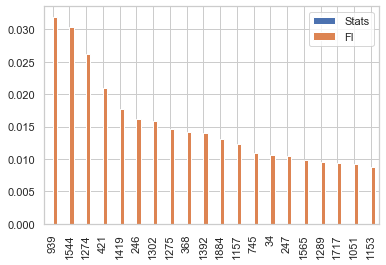

In [112]:
data = pd.DataFrame.from_dict(d, orient="index")
data = data.transpose()
data = data.sort_values(by='FI', ascending=False)
data[:20].plot(kind="bar")

In [113]:
data.drop(columns="Stats", inplace=True)
data.reset_index(inplace=True)

In [114]:
data.rename(columns={"index":"Stats"}, inplace=True)

In [115]:
feat_imp=data[:10].sort_values(by='FI', ascending=False)

In [116]:
feat_imp

,Stats,FI
0,939,0.0319694
1,1544,0.0304011
2,1274,0.0261771
3,421,0.0209456
4,1419,0.0177726
5,246,0.0161024
6,1302,0.0158668
7,1275,0.0145786
8,368,0.0141111
9,1392,0.0140277


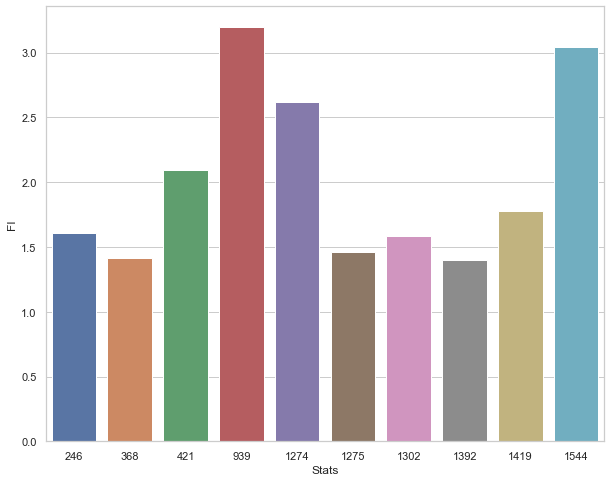

In [117]:
x=feat_imp.Stats
y=feat_imp.FI

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=x, y=y, data = feat_imp)

In [ ]:
dataset = [d.split() for d in df.delisted]
vocab = gensim.corpora.Dictionary(dataset)


In [ ]:
vocab[939]

246:samething, 368:description, 421:model, 939:breckinridge

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))
plt.bar(x=x, height=y, data = feat_imp)

x = ['place', 'presentable', 'chance', 'front', 'quite', 'health', 'deal', 'fulfil', 'unlike', 'surprisingly']
l = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


ax.set_xticks(l)
ax.set_xticklabels(x)
plt.xticks(rotation=25)
plt.title("Top 10 Feature Importance", fontsize=26)
plt.ylabel("Feature Importance Score", fontsize=15)
plt.xlabel("Words", fontsize=15);





In [ ]:
clean_df[clean_df["delisted"].str.contains("breckinridge")]

In [ ]:
clean_df.iloc[10].review_text

might be better off pickleing the dataframe instead of saving it as csv 

In [ ]:
# with gzip.open(‘data/jan_thru_may_labeled_mask_tweets.pkl’, ‘wb’) as goodbye:
#     pickle.dump(df, goodbye, protocol=pickle.HIGHEST_PROTOCOL)
# uncomment to load
# with gzip.open(‘data/jan_thru_may_labeled_mask_tweets.pkl’, ‘rb’) as hello:
#     df = pickle.load(hello)

# SMOTE

In [ ]:
# from imblearn.over_sampling import SMOTE
# os = SMOTE(random_state=0)


# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# columns = X_train.columns

# os_data_X,os_data_y=os.fit_sample(X_train, y_train)

# os_data_X = pd.DataFrame(data=os_data_X,columns=columns )

# os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])

# # we can Check the numbers of our data
# print("length of oversampled data is ",len(os_data_X))
# print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
# print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
# print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
# print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

#### figure out/exp class imbalance algos (upsample)
#### change hyperperameters (weight = balanced, try bigrams and trigrams)
#### log reg for coef. (+ or -) 
#### LDA topic modeling



In [ ]:
clean_df.head(2)

In [ ]:
# SVM models 


In [ ]:
#clean_df.to_csv("data/full_clean_df.csv")